<a href="https://colab.research.google.com/github/hizafioramahardika/PCVK_Genap_2021/blob/main/Week10_Hiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hiza Fiora Mahardika
# 2341729017

# **PRAKTICUM 1**

1. Go to https://colab.research.google.com/ .

---

After making sure that Google Colab is
connected to your Github , continue by selecting the repository that was used in the
lab last week , rename the file to "Week 10 .ipynb".


then import the exixting folder on your drive as follows

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. IMport the following libraries that will be used during the following week 6 practicum trial.

# **Import Library**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) according to the description from the chart shown above.

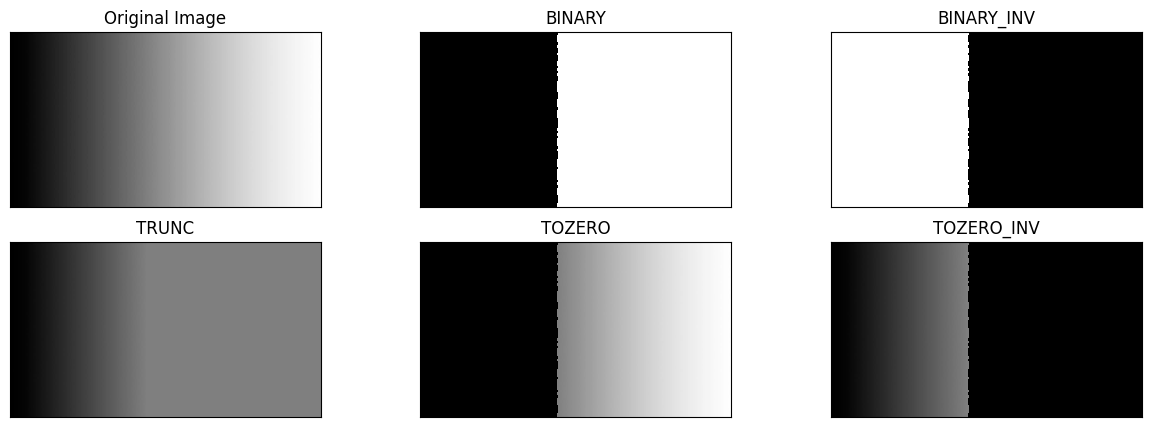

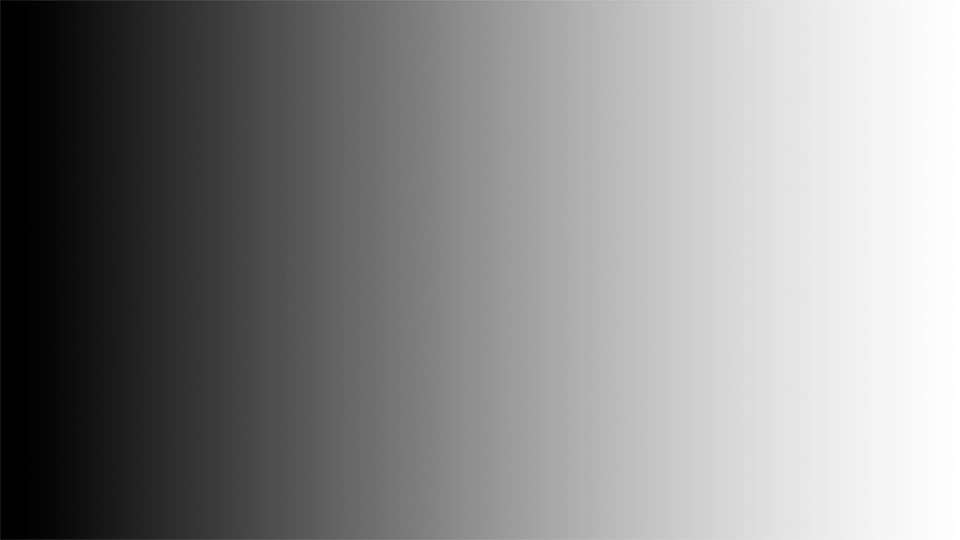

AttributeError: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename_1 = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 127    # threshold value that has been determined

# 1. Original Image
thresh1[img_g > thresh] = 255
thresh1[img_g <= thresh] = 0

# 2. Binary threshold inverse
thresh2 = 255 - thresh1
# 3. Threshold Truncate
thresh3[img_g > thresh] = thresh
# 4. Threshold Tozero
thresh4[img_g <= thresh] = 0
# 5. Threshold Tozero Inverse
thresh5[img_g > thresh] = 0

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Using Library
img_g = cv2.imread(filename_1)
ret, thresh1 = cv2.threshold(img_g, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_g, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_g, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_g, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_g, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    cv2_imshow(images[i])
    cv2_imshow(titles[i])


4. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following image . (use the
image lena_gs_lc2.jpg so that it really looks different between the otsu's results and
the usual global threshold)

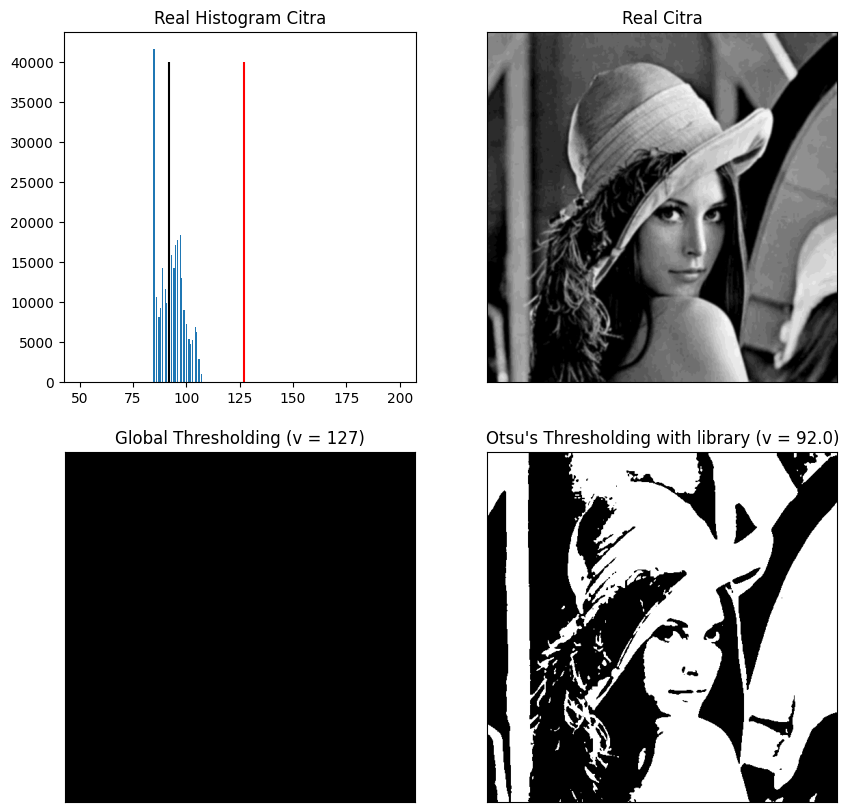

<ipython-input-11-171839be1b24>:45: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-11-171839be1b24>:46: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb)/wf


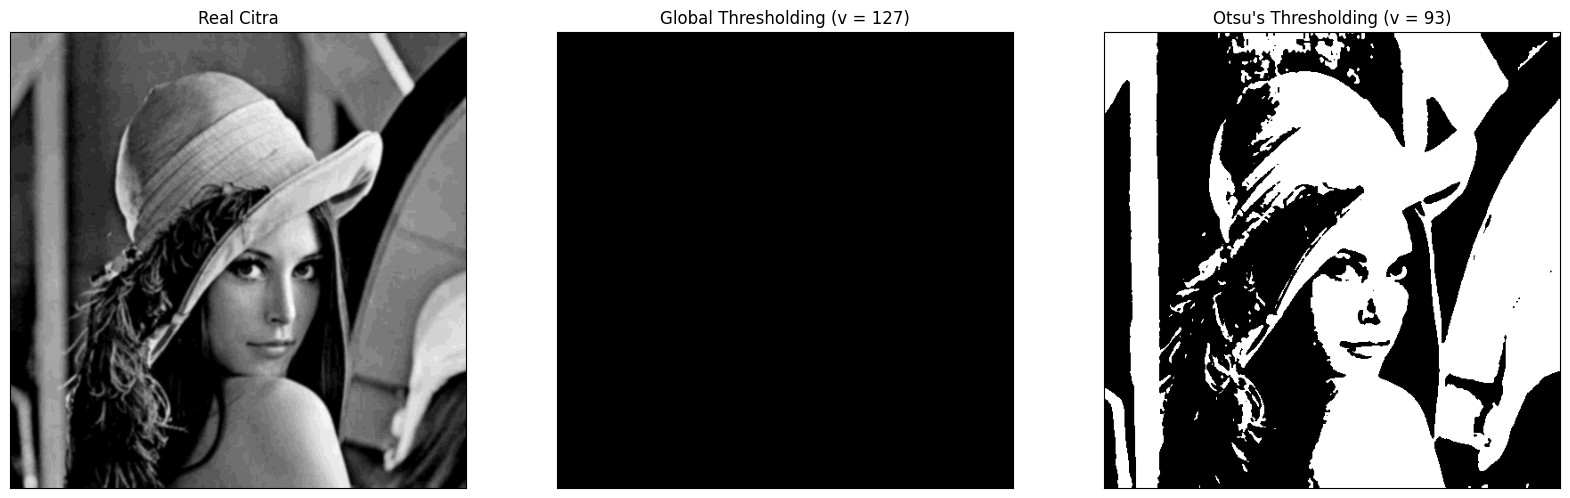

In [ ]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg')
img_lgs = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(img_lgs,(5,5),0)
thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

x = ("Otsu's Thresholding with library (v = ")+str(ret2)+")"
titles = ['Real Citra', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #The red vertical line shows the global threshold of 127
plt.vlines(ret2,0,40000,colors='black') #The black vertical line shows Otsu's threshold 92 results
plt.title('Real Histogram Citra')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# Without Using library
img_lgs = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(img_lgs, (5,5),0)
hist = cv2.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Real Citra', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

5. Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image provided in the images folder.
Instructions:

  - You can use cv.calcHist to display a histogram.
  - Open the following link https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
  - from the link, note that cv.calcHist has one of the parameters, namely mask. If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called image segment).


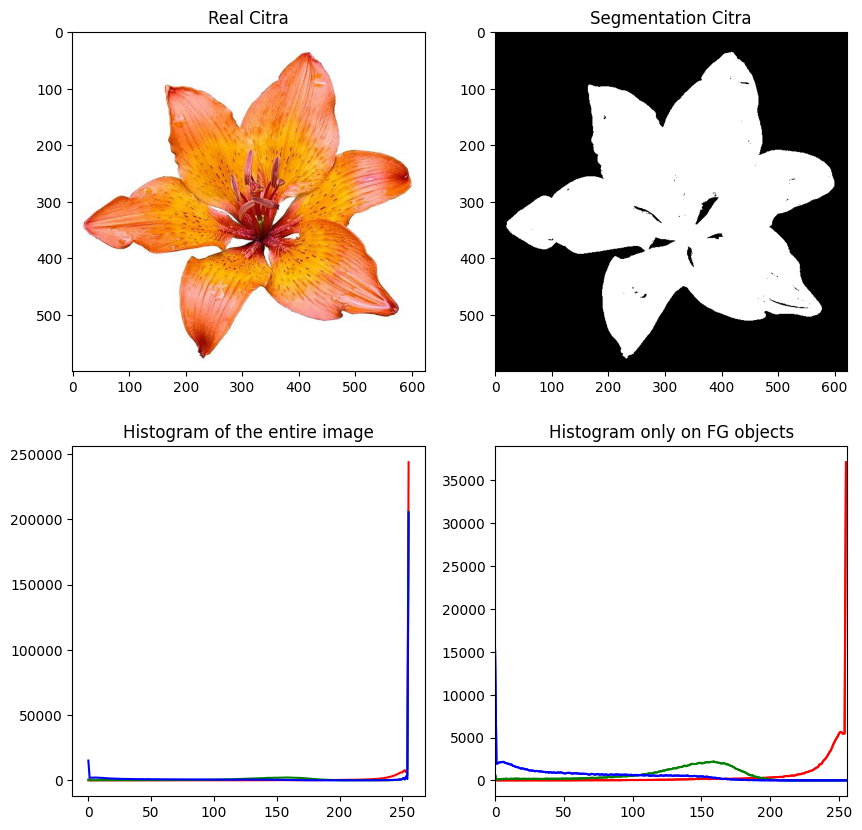

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/lily.jpg')
img_l = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Real Citra')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segmentation Citra')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram of the entire image')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram of the entire image')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram only on FG objects')
    plt.xlim([0,256])

plt.show()


6. Perform color segmentation on the image "peppers.jpg", display only yellow
colors . (Hint: you can use K-Means to display only certain colors)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f2fa092a6b0>)

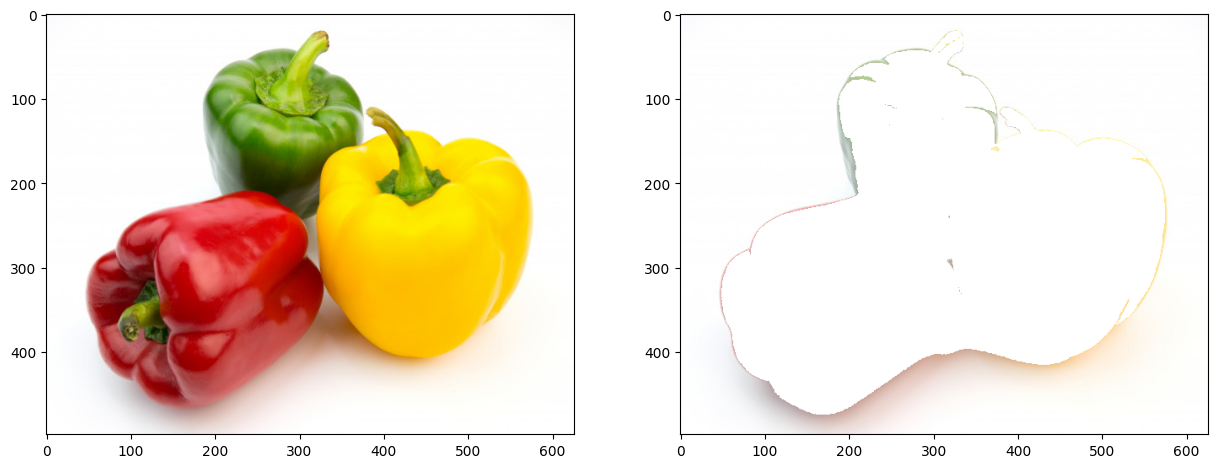

In [15]:
filename = ('/content/drive/MyDrive/PCVK/peppers.jpg')
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3  # Ubah menjadi 3 cluster karena kita ingin menemukan 3 warna utama
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

# Mengisolasi warna hijau
green_cluster = centers[1]  # Jika warna hijau adalah cluster kedua, gunakan indeks 1 (indeks dimulai dari 0)

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]  # Isolasi warna hijau dengan mengubah yang bukan warna hijau menjadi putih
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_image0)


when you display a certain color, explain the problem you are facing and why it happened

7. Open the crossword.jpg file. with the knowledge of thresholding that you have learned. Perform binary thresholding with the best result in your opinion. Copy the code and image result in this module.

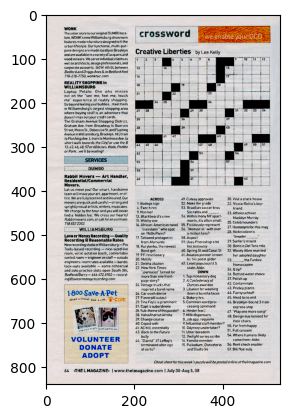

In [16]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()


#PRAKTIKUM 2

1. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp.png agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-17-5d384e70c92d>:21: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
<ipython-input-17-5d384e70c92d>:22: RuntimeWarning: invalid value encountered in divide
  muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)


119


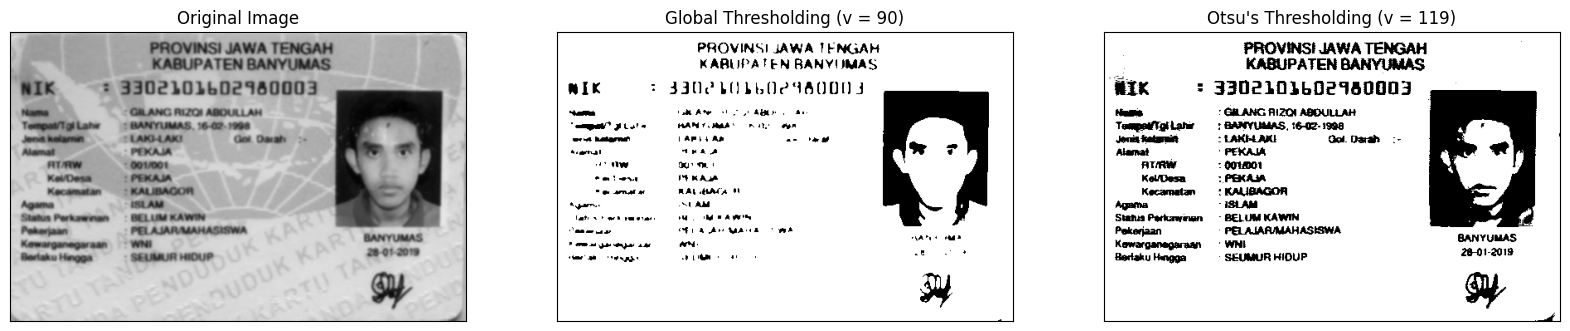

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/contoh_ktp.png')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]:
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)
        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

otsu_binarized, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

titles = ['Original Image', 'Global Thresholding (v = 90)', x]
images = [blur, th1, otsu_binarized]

plt.figure(figsize=(20, 15))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


2. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp.png yang sudah disediakan di folder images.
Petunjuk:
- anda dapat gunakan cv.calcHist untuk menampilkan histogram.
- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).


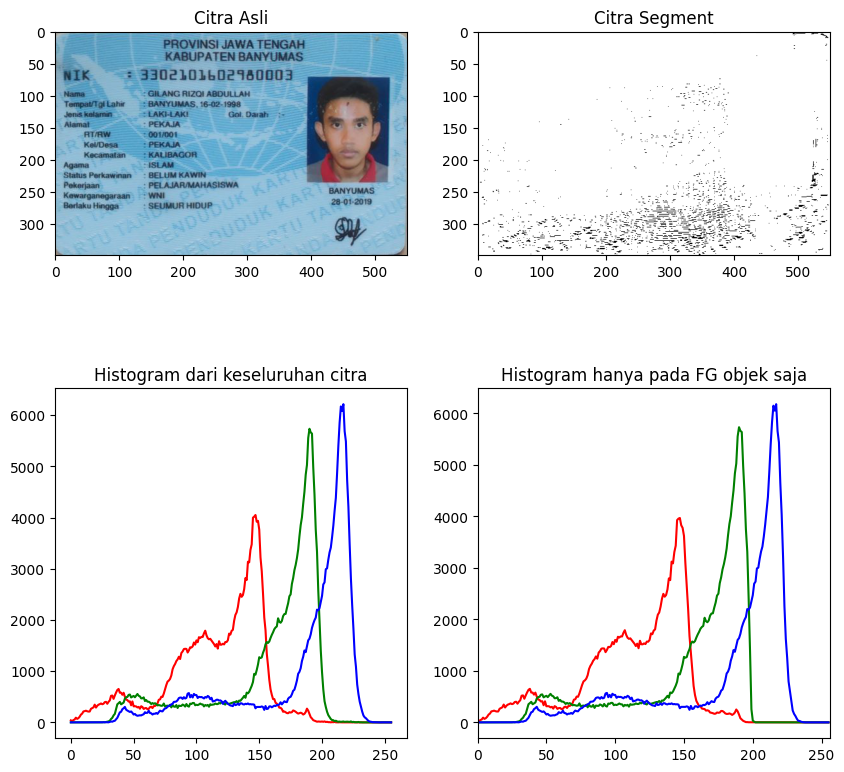

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/contoh_ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')

# Segmented Image
plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')

color = ('r', 'g', 'b')

for i, col in enumerate(color):
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])

    # Histogram for the entire image
    plt.subplot(2, 2, 3)
    plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')

    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])

    # Histogram for the segmented region (foreground)
    plt.subplot(2, 2, 4)
    plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')

    plt.xlim([0, 256])

plt.show()


3. Lakukan segmentasi warna pada image " contoh_ktp.png ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f2f9c9b8670>)

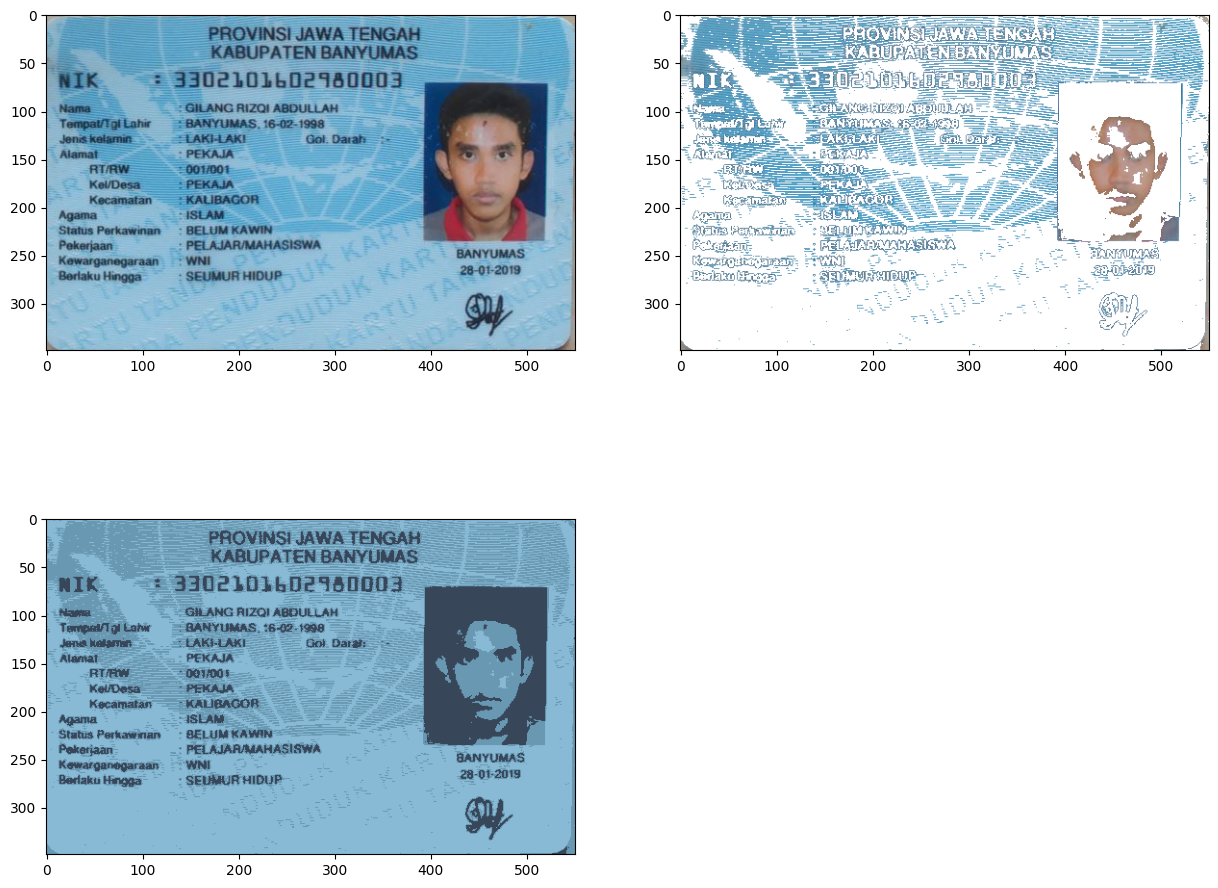

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/contoh_ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the array to 2D
pixel_values = img.reshape((-1, 3))

# Convert to float
pixel_values = np.float32(pixel_values)

# Define the stopping criteria for K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters (in your case, 3 clusters)
k = 3

# Perform K-Means clustering
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centroid points to integers
centers = np.uint8(centers)

# Flatten the label array
labels = labels.flatten()

# Convert original pixel colors to the color of each centroid
segmented_image = centers[labels]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(img.shape)

# Create a mask
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)
